In [1]:
import pandas as pd
import os

HOUSING_PATH=os.path.join("../../datasets","housing")
HOUSING_FILE=os.path.join(HOUSING_PATH,"housing.csv")

# returns a Pandas DataFrame
def load_data (data_file=HOUSING_FILE):
    data = pd.read_csv(data_file)
    return data

housing=load_data()

# Data exploration
# housing.head()
# housing.info()
# housing["ocean_proximity"].value_counts()
# housing.describe()

# Jupyter directive to draw in Jupyter
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,10))
# plt.show()

# Create random test and training sets with stratification by income
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
# Pandas cut() retuns a column containing a histogram
housing["temp_income_cat"] = pd.cut(housing["median_income"],bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(housing, housing["temp_income_cat"]):
    # Pandas DataFrame.loc() retrieves from array by location 
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

# Evaluate statification
#housing["temp_income_cat"].value_counts()/len(housing["temp_income_cat"])
#train_set["temp_income_cat"].value_counts()/len(strat_train_set)

# Remove the temporary column income_category.
for s in (train_set,test_set,housing):
    # Pandas DataFrame.drop() removes a column 
    s.drop("temp_income_cat",axis=1,inplace=True)
  
# From now on, look at the training set only
housing = train_set.copy()

%matplotlib inline
import matplotlib.pyplot as plt

# Plot a distribution for each column of the training set.
# housing.hist(bins=50,figsize=(20,10))
# plt.show()   # optional in Jupyter

# Visualize geographical distribution
#housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
#housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
#    s=housing["population"]/100, label="population", figsize=(10,7),
#    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
#plt.show()

FileNotFoundError: [Errno 2] File b'../datasets/housing/housing.csv' does not exist: b'../datasets/housing/housing.csv'

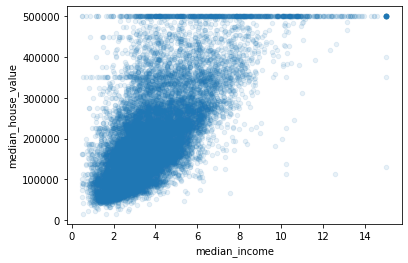

In [145]:
# Pearson's
#corr_matrix = housing.corr()
#corr_matrix["median_house_value"].sort_values()

# Scatter plots of Pearson's
# Skew (long tails to right) suggests log transformation before training.
#from pandas.plotting import scatter_matrix
#attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
#scatter_matrix(housing[attributes], figsize=(12,8))
#plt.show()

# Scatter plot for most predictive variable.
# Horizontal lines indicate data quirks that could be smoothed before training.
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.show()

In [150]:
# From now on, separate training set from training labels
# Pandas drop() creates a copy minus one column.
train_set.sort_index(inplace=True)
train_set.reset_index(drop=True,inplace=True)
housing_data = train_set.drop("median_house_value",axis=1)
housing_labels = train_set["median_house_value"].copy()

# Fix missing features. One-off using Pandas fillna
# Pandas DataFrame offers: 
# 1. drop data rows missing the feature: dropna()
# 2. drop the featur: drop()
# 3. impute the missing value: fillna()
#median = housing_data["total_bedrooms"].median()
#housing_data["total_bedrooms"].fillna(median,inplace=True)  

# Fix missing features. Use a repeatable process using scikit. 
# Apply the Imputer. Unfortunately, it only works on numeric data.
temp_numeric = housing_data.drop("ocean_proximity",axis=1)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(temp_numeric)
array_with_imputes = imputer.transform(temp_numeric)
housing_with_imputes = pd.DataFrame(array_with_imputes, columns=temp_numeric.columns, index=temp_numeric.index)
housing_with_imputes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
16507,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125
16508,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
16509,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
16510,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000


In [151]:
# For validation, show that imputed columns have same stats as original columns.
housing_with_imputes.median().values
temp_numeric.median().values
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
16507,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
16508,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
16509,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
16510,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND


In [156]:
# These should have the same number of rows
housing_data.shape
housing_labels.shape
housing_with_imputes.shape
train_set.shape   # 16512 x 10
# These should all be in the same order. Check head() or tail().
housing_data.tail()
temp_numeric.tail()
housing_with_imputes.tail()
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
16507,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
16508,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
16509,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
16510,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND


In [157]:
# Apply Encoder to categoric data.
temp_categoric = housing_data["ocean_proximity"]   # this is a Pandas Series object
temp_categoric = housing_data[["ocean_proximity"]]   # this is a Pandas DataFrame object
type(temp_categoric)
temp_categoric.shape   # 16512 x 1
temp_categoric

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
16507,INLAND
16508,INLAND
16509,INLAND
16510,INLAND


In [158]:
import numpy
# Try the ordinal encoder. Then throw this away because 1,2,3,4,5 implies ordering that does not exist.
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoded = encoder.fit_transform(temp_categoric)  # create numpy n-dimensional array
numpy.unique(encoded)  # lists the numbers
encoder.categories_    # lists the words
encoded.size

16512

In [160]:
# Use one-hot encoding rather than sequential numbers.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(temp_categoric)   # 1 bit per row, stored in sparse matrix
encoder.categories_     # lists the words
encoded.toarray()       
temp_df = pd.DataFrame(encoded.toarray())
temp_df.columns = encoder.categories_
encoded.size
temp_categoric.size
temp_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
16507,0.0,1.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,0.0,1.0,0.0,0.0,0.0
16510,0.0,1.0,0.0,0.0,0.0


In [161]:
# Combine numeric and categoric data
housing_prepared = housing_with_imputes.join(temp_df)
housing_prepared.shape
housing_with_imputes.shape
temp_df.shape
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
16507,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,INLAND
16508,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
16509,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
16510,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND


In [163]:
housing_data.iloc[0]

longitude              -122.23
latitude                 37.88
housing_median_age          41
total_rooms                880
total_bedrooms             129
population                 322
households                 126
median_income           8.3252
ocean_proximity       NEAR BAY
Name: 0, dtype: object